In [156]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [157]:
df = pd.read_csv('telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [158]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [159]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [160]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [161]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


### 3.2 Data Preparation

In [162]:
# pd.to_numeric(df.totalcharges)

In [163]:
tc = pd.to_numeric(df.totalcharges, errors='coerce') # coerce = ignoring the issue

In [164]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [165]:
df.totalcharges = df.totalcharges.fillna(0) # remove 0

In [166]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [167]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [168]:
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [169]:
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

### 3.3 Set up validation framework - Scikit Learn

In [170]:
from sklearn.model_selection import train_test_split # Scikit learn install

In [171]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) # Splitting 80%/20% (0.2)

In [172]:
df_train, df_val = train_test_split(df, test_size=0.25, random_state=1) # Splitting 60%/20%(25%)

In [173]:
len(df_train), len(df_val), len(df_test)

(5282, 1761, 1409)

In [174]:
df_train.head()# Has weird index nr and need to be removed

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
6463,0872-caszj,male,0,yes,no,59,yes,yes,dsl,yes,...,no,yes,no,yes,one_year,yes,mailed_check,69.10,4096.9,0
289,3580-reoac,male,0,no,no,10,yes,no,dsl,no,...,no,no,no,no,month-to-month,yes,credit_card_(automatic),44.85,435.4,1
4356,3806-yazov,female,0,no,no,3,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,18.80,56.0,0
6222,0130-sxoun,male,0,no,no,66,yes,yes,fiber_optic,no,...,no,no,no,yes,month-to-month,no,credit_card_(automatic),89.40,5976.9,0
1790,3096-izetn,female,0,no,no,12,yes,no,fiber_optic,no,...,no,no,no,yes,month-to-month,no,bank_transfer_(automatic),78.10,947.3,1


In [175]:
## Remove Index to make it more compact
df_train = df_train.reset_index(drop=True)
df_val = df_train.reset_index(drop=True)
df_test = df_train.reset_index(drop=True)

In [176]:
## Check Churn
y_train = df_train.churn.values
y_val = df_train.churn.values
y_test = df_train.churn.values

In [177]:
## Remove churn from Dataframe
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3.4 EDA (Check missing values, look target variable (churn) + numerical & categorical variables

In [178]:
df_full_train = df_full_train.reset_index(drop=True) # Remove index on full_train

In [179]:
df_full_train.isnull().sum() # Check if its all 0 or not

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [180]:
df_full_train.churn.value_counts() # To see total nr between 0 + 1

churn
0    4113
1    1521
Name: count, dtype: int64

In [181]:
## 2 options to check median nr

df_full_train.churn.value_counts(normalize=True) # To see it as number
## or 
df_full_train.churn.mean()

np.float64(0.26996805111821087)

In [182]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [183]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [184]:
numerical = ['tenure','monthlycharges','totalcharges'] # Sorting out from dtypes that has number 

In [185]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [186]:
# Remove all numbers related - 'customerid', 'monthlycharges', 'totalcharges', 'churn', 'tenure'
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'] 

In [187]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

### 3.5 Churn rate & risk ratio

#### Churn rate

In [188]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [189]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [190]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
float(churn_male)

0.2632135306553911

In [191]:
global_churn = df_full_train.churn.mean()
float(global_churn)

0.26996805111821087

In [192]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [193]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean() 
float(churn_partner)

0.20503330866025166

In [194]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean() 
float(churn_no_partner)

0.3298090040927694

In [195]:
global_churn - churn_partner
float(global_churn - churn_partner)

0.06493474245795922

In [196]:
global_churn - churn_no_partner
float(global_churn - churn_no_partner)

-0.05984095297455855

#### Risk Ratio

In [197]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [198]:
churn_partner / global_churn

np.float64(0.7594724924338315)

##### SQL  
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;

In [199]:
from IPython.display import display # To display everything from python loop

In [200]:
# From SQL above - "Categorical from list above"
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#### 3.6 Feature importance: Mutual information - Scikit Learn

In [201]:
from sklearn.metrics import mutual_info_score

In [202]:
mutual_info_score(df_full_train.churn, df_full_train.contract) * 100

9.832038740415559

In [203]:
mutual_info_score(df_full_train.churn, df_full_train.gender) * 100

0.01174846211139946

In [204]:
mutual_info_score(df_full_train.churn, df_full_train.partner) * 100

0.9967689095399745

In [205]:
def mutual_info_churn_score(series): 
    return mutual_info_score(series, df_full_train.churn)

In [206]:
# mi = mutual information
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#### 3.7 Correlation coefficient

In [207]:
df_full_train.tenure.max()

np.int64(72)

In [208]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

##### Churn rate - Tenure

In [209]:
df_full_train[df_full_train.tenure <= 2].churn.mean() * 100

np.float64(59.53420669577875)

In [210]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean() * 100

np.float64(39.94413407821229)

In [211]:
df_full_train[df_full_train.tenure > 12].churn.mean() * 100

np.float64(17.63490833978828)

##### Churn rate - Monthlycharges

In [212]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean() * 100

np.float64(8.795411089866157)

In [213]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean() * 100

np.float64(18.340943683409435)

In [214]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean() * 100

np.float64(32.499341585462204)

In [215]:
## Sum up from info above
## Tenure ##
# tenure <= 2  59.53%
# tenure > 2 &tenure <= 12 = 39.90%
# tenure > 12 - 17.63%

#### 3.8 One-hot encoding (Scikit Learn)

In [216]:
from sklearn.feature_extraction import DictVectorizer

In [217]:
df_train[['gender', 'contract']].iloc[:100]

,gender,contract
0,male,one_year
1,male,month-to-month
2,female,month-to-month
3,male,month-to-month
4,female,month-to-month
...,...,...
95,female,month-to-month
96,female,two_year
97,male,one_year
98,male,month-to-month


In [234]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records') # Nr 1

# Nr 2 - Train = Training
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [228]:
dicts[0]

{'gender': 'male', 'contract': 'one_year'}

In [219]:
dv = DictVectorizer(sparse=False)

In [240]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [241]:
X_train.shape

(5282, 45)

In [239]:
X_train = dv.fit_transform(train_dicts)

In [242]:
# Validation 
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [243]:
X_val = dv.transform(val_dicts)

In [237]:
list(dv.get_feature_names_out()) # Scikit new version, old version is without "_out"

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [238]:
dv.transform(train_dicts[:5])

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 6.9100e+01, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 5.9000e+01, 4.0969e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 4.4850e+01, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0

#### 3.9 Logistic Regression

In [244]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [247]:
z = np.linspace(-7, 7, 51)

In [248]:
sigmoid(10000)

np.float64(1.0)

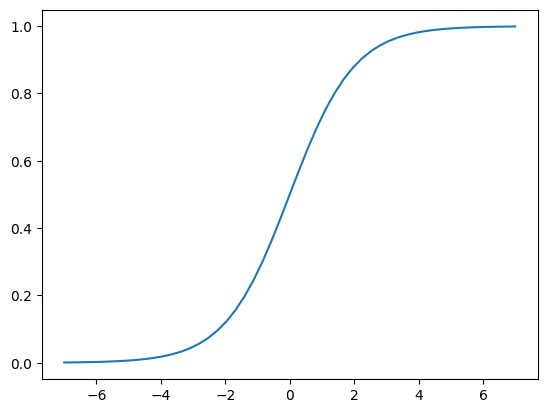

In [249]:
plt.plot(z, sigmoid(z))

In [250]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [251]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
        
    result = sigmoid(score)
    return result

#### 3.10 Training Logistic Regression 

In [252]:
from sklearn.linear_model import LogisticRegression

In [257]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Anwender\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [261]:
model.intercept_[0]

np.float64(-0.12207368572358127)

In [262]:
model.coef_[0].round(3)

array([ 0.246, -0.142, -0.225,  0.03 , -0.152,  0.066, -0.092, -0.097,
       -0.067, -0.055, -0.288,  0.258, -0.092,  0.004, -0.235,  0.035,
        0.078,  0.088, -0.092, -0.118,  0.24 , -0.092, -0.27 , -0.261,
        0.14 , -0.068, -0.054, -0.078, -0.108,  0.255, -0.191,  0.035,
       -0.157,  0.189, -0.096, -0.092,  0.065, -0.073, -0.092,  0.043,
        0.245, -0.092, -0.275, -0.068,  0.   ])

In [266]:
model.predict(X_train) # Hard Predictions

array([0, 0, 0, ..., 1, 1, 0], shape=(5282,))

In [268]:
model.predict_proba(X_train) # Soft Predictions

array([[0.96862837, 0.03137163],
       [0.62012142, 0.37987858],
       [0.82838249, 0.17161751],
       ...,
       [0.36117329, 0.63882671],
       [0.49947795, 0.50052205],
       [0.93441928, 0.06558072]], shape=(5282, 2))

In [272]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.03137163, 0.37987858, 0.17161751, ..., 0.63882671, 0.50052205,
       0.06558072], shape=(5282,))

In [275]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ...,  True,  True, False], shape=(5282,))

In [274]:
df_val[churn_decision].customerid

4       3096-izetn
5       2725-kxxwt
7       9172-jitsm
8       1062-lhzod
12      1268-asbga
           ...    
5269    3834-xuifc
5271    6023-yebup
5277    0781-lkxbr
5279    8868-wozgu
5280    1251-krreg
Name: customerid, Length: 1169, dtype: object

In [279]:
float((y_val == churn_decision).mean() * 100)

80.34835289663006

In [281]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [287]:
df_pred['cor'] = (df_pred['prediction'] == df_pred['actual']).astype(int)
df_pred 

,probability,prediction,actual,cor
0,0.031372,0,0,1
1,0.379879,0,1,0
2,0.171618,0,0,1
3,0.151051,0,0,1
4,0.503620,1,1,1
...,...,...,...,...
5277,0.817604,1,1,1
5278,0.003400,0,0,1
5279,0.638827,1,1,1
5280,0.500522,1,1,1


In [277]:
churn_decision.astype(int)

array([0, 0, 0, ..., 1, 1, 0], shape=(5282,))

In [288]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [289]:
df_pred

,probability,prediction,actual,cor,correct
0,0.031372,0,0,1,True
1,0.379879,0,1,0,False
2,0.171618,0,0,1,True
3,0.151051,0,0,1,True
4,0.503620,1,1,1,True
...,...,...,...,...,...
5277,0.817604,1,1,1,True
5278,0.003400,0,0,1,True
5279,0.638827,1,1,1,True
5280,0.500522,1,1,1,True


#### 3.11 Model Intepration 

In [294]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.246),
 'contract=one_year': np.float64(-0.142),
 'contract=two_year': np.float64(-0.225),
 'dependents=no': np.float64(0.03),
 'dependents=yes': np.float64(-0.152),
 'deviceprotection=no': np.float64(0.066),
 'deviceprotection=no_internet_service': np.float64(-0.092),
 'deviceprotection=yes': np.float64(-0.097),
 'gender=female': np.float64(-0.067),
 'gender=male': np.float64(-0.055),
 'internetservice=dsl': np.float64(-0.288),
 'internetservice=fiber_optic': np.float64(0.258),
 'internetservice=no': np.float64(-0.092),
 'monthlycharges': np.float64(0.004),
 'multiplelines=no': np.float64(-0.235),
 'multiplelines=no_phone_service': np.float64(0.035),
 'multiplelines=yes': np.float64(0.078),
 'onlinebackup=no': np.float64(0.088),
 'onlinebackup=no_internet_service': np.float64(-0.092),
 'onlinebackup=yes': np.float64(-0.118),
 'onlinesecurity=no': np.float64(0.24),
 'onlinesecurity=no_internet_service': np.float64(-0.092),
 'onlinesecurity=yes': 

In [295]:
small = ['contract', 'tenure', 'monthlycharges']

In [296]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'one_year', 'tenure': 59, 'monthlycharges': 69.1},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 44.85},
 {'contract': 'month-to-month', 'tenure': 3, 'monthlycharges': 18.8},
 {'contract': 'month-to-month', 'tenure': 66, 'monthlycharges': 89.4},
 {'contract': 'month-to-month', 'tenure': 12, 'monthlycharges': 78.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 90.75},
 {'contract': 'month-to-month', 'tenure': 58, 'monthlycharges': 65.25},
 {'contract': 'month-to-month', 'tenure': 26, 'monthlycharges': 90.8},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 69.9},
 {'contract': 'one_year', 'tenure': 53, 'monthlycharges': 74.1}]

In [297]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [298]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [299]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [300]:
X_train_small = dv_small.transform(dicts_train_small)

In [301]:
model_small = LogisticRegression(solver='lbfgs')
model_small.fit(X_train_small, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [302]:
w0 = model_small.intercept_[0]
w0

np.float64(-1.9328764334198936)

In [303]:
w = model_small.coef_[0]
w.round(3)

array([ 0.317, -0.634, -1.576,  0.029, -0.037])

In [304]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.317),
 'contract=one_year': np.float64(-0.634),
 'contract=two_year': np.float64(-1.576),
 'monthlycharges': np.float64(0.029),
 'tenure': np.float64(-0.037)}

In [309]:
sigmoid(-2.47 + 0.317 + 50 * 0.029)

np.float64(0.3311474251456047)

#### 3.12 Using the model

In [310]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [312]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [313]:
y_full_train = df_full_train.churn.values

In [318]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

C:\Users\Anwender\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [325]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [331]:
X_test = dv.transform(dicts_test)

In [332]:
y_pred = model.predict_proba(X_test)[:,1]

In [333]:
churn_decision = (y_pred >= 0.5)

In [334]:
y_test

array([0, 1, 0, ..., 1, 1, 0], shape=(5282,))

In [338]:
float((churn_decision == y_test).mean() * 100)

80.57553956834532

In [342]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'yes',
 'streamingtv': 'no',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'bank_transfer_(automatic)',
 'tenure': 16,
 'monthlycharges': 68.25,
 'totalcharges': 1114.85}

In [347]:
X_small = dv.transform([customer])

In [348]:
model.predict_proba(X_small)[0, 1]

np.float64(0.06089734018627856)

In [349]:
y_test[-1]

np.int64(0)